<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_cluster_data_multi_delta_(_0_4)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_-0.4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-0.4_n30.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,71.945946,39.788022,32.915277,-0.198925,154.450320,154.524339,-0.074020
1,0.0,1.0,22.973039,51.483753,39.777039,-0.332106,123.901725,124.364633,-0.462907
2,0.0,2.0,94.009889,85.320662,80.688278,-0.245560,269.773270,270.238882,-0.465612
3,0.0,3.0,29.124765,85.932547,33.735759,0.402916,159.195987,159.030396,0.165591
4,0.0,4.0,55.949254,91.236244,53.338663,-0.345692,210.178469,210.780302,-0.601833
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,71.283956,94.129792,89.738027,-0.046362,265.105412,264.943027,0.162385
29996,999.0,26.0,58.578417,52.678310,43.383053,-0.394037,164.245743,164.719124,-0.473381
29997,999.0,27.0,36.215699,53.121754,43.329043,0.173972,142.840468,142.691797,0.148671
29998,999.0,28.0,32.818839,78.915089,64.387464,-0.056656,186.064736,185.964277,0.100458


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    71.945946  39.788022  32.915277  ...  154.450320  154.524339 -0.074020
      1.0    22.973039  51.483753  39.777039  ...  123.901725  124.364633 -0.462907
      2.0    94.009889  85.320662  80.688278  ...  269.773270  270.238882 -0.465612
      3.0    29.124765  85.932547  33.735759  ...  159.195987  159.030396  0.165591
      4.0    55.949254  91.236244  53.338663  ...  210.178469  210.780302 -0.601833
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   71.283956  94.129792  89.738027  ...  265.105412  264.943027  0.162385
      26.0   58.578417  52.678310  43.383053  ...  164.245743  164.719124 -0.473381
      27.0   36.215699  53.121754  43.329043  ...  142.840468  142.691797  0.148671
      28.0   32.818839  78.915089  64.387464  ...  186.064736  185.964277  0.100458
      29.0   36.689560  84.688345  62.114517  ...  192.907642  193.326193 -0.418551

[30000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    71.945946  39.788022  32.915277  ...  154.450320  154.524339 -0.074020
      1.0    22.973039  51.483753  39.777039  ...  123.901725  124.364633 -0.462907
      2.0    94.009889  85.320662  80.688278  ...  269.773270  270.238882 -0.465612
      3.0    29.124765  85.932547  33.735759  ...  159.195987  159.030396  0.165591
      4.0    55.949254  91.236244  53.338663  ...  210.178469  210.780302 -0.601833
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   71.283956  94.129792  89.738027  ...  265.105412  264.943027  0.162385
      26.0   58.578417  52.678310  43.383053  ...  164.245743  164.719124 -0.473381
      27.0   36.215699  53.121754  43.329043  ...  142.840468  142.691797  0.148671
      28.0   32.818839  78.915089  64.387464  ...  186.064736  185.964277  0.100458
      29.0   36.689560  84.688345  62.114517  ...  192.907642  193.326193 -0.418551

[30000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,71.945946,39.788022,32.915277,-0.198925,154.450320,154.524339,-0.074020
1,0.0,1.0,22.973039,51.483753,39.777039,-0.332106,123.901725,124.364633,-0.462907
2,0.0,2.0,94.009889,85.320662,80.688278,-0.245560,269.773270,270.238882,-0.465612
3,0.0,3.0,29.124765,85.932547,33.735759,0.402916,159.195987,159.030396,0.165591
4,0.0,4.0,55.949254,91.236244,53.338663,-0.345692,210.178469,210.780302,-0.601833
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,71.283956,94.129792,89.738027,-0.046362,265.105412,264.943027,0.162385
29996,999.0,26.0,58.578417,52.678310,43.383053,-0.394037,164.245743,164.719124,-0.473381
29997,999.0,27.0,36.215699,53.121754,43.329043,0.173972,142.840468,142.691797,0.148671
29998,999.0,28.0,32.818839,78.915089,64.387464,-0.056656,186.064736,185.964277,0.100458


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    71.945946  39.788022  32.915277  ...  154.450320  154.524339 -0.074020
      1.0    22.973039  51.483753  39.777039  ...  123.901725  124.364633 -0.462907
      2.0    94.009889  85.320662  80.688278  ...  269.773270  270.238882 -0.465612
      3.0    29.124765  85.932547  33.735759  ...  159.195987  159.030396  0.165591
      4.0    55.949254  91.236244  53.338663  ...  210.178469  210.780302 -0.601833
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   71.283956  94.129792  89.738027  ...  265.105412  264.943027  0.162385
      26.0   58.578417  52.678310  43.383053  ...  164.245743  164.719124 -0.473381
      27.0   36.215699  53.121754  43.329043  ...  142.840468  142.691797  0.148671
      28.0   32.818839  78.915089  64.387464  ...  186.064736  185.964277  0.100458
      29.0   36.689560  84.688345  62.114517  ...  192.907642  193.326193 -0.418551

[30000 rows x 7 columns]

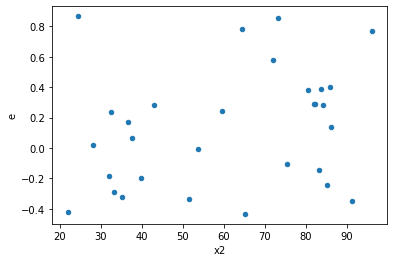

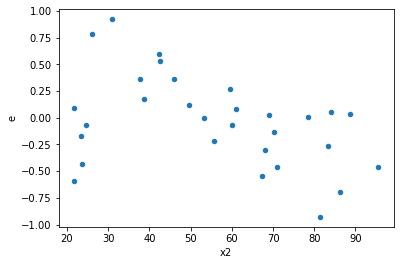

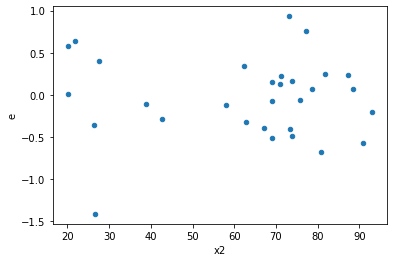

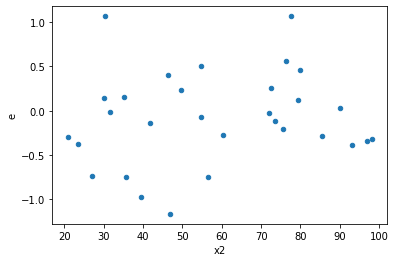

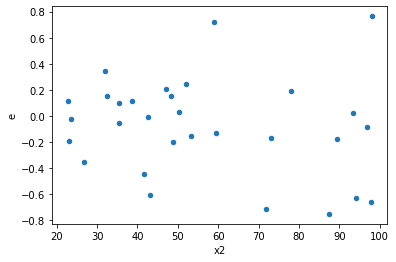

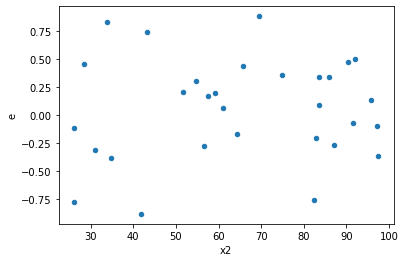

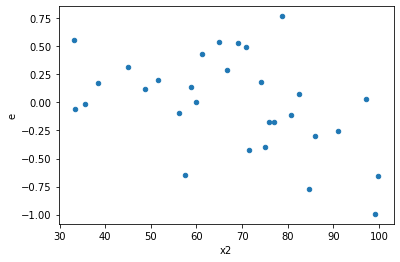

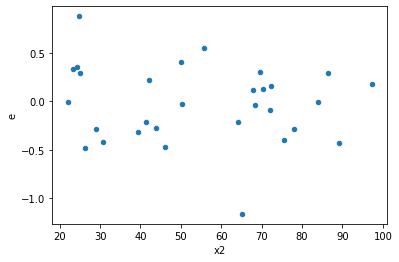

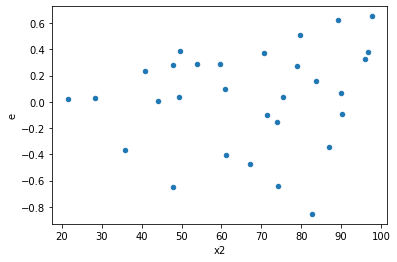

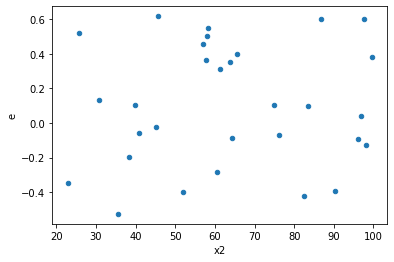

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,9.0,15.0,0.7664970328343012,3.065261356901346,0.08516633698158901,0.20435075712675638,2.399431094129741,0.12909757181796122,0.9354512140910194,0.06454878590898061,Reject001=1 : Homoscedasticity
3.0,7.0,17.0,1.3563727293172834,5.599067215259898,0.19376753275961192,0.3293568950152881,1.6997527414661795,0.3511328735428032,0.8244335632285984,0.1755664367714016,Reject001=1 : Homoscedasticity
5.0,13.0,11.0,1.4239890434432216,2.510000235547695,0.10953761872640166,0.228181839595245,2.0831367547361763,0.2304432692300573,0.8847783653849713,0.11522163461502866,Reject001=1 : Homoscedasticity
10.0,13.0,11.0,1.5395736583450843,1.871831460359424,0.11842874294962187,0.17016649639631126,1.4368682142366231,0.5539815289761658,0.7230092355119171,0.2769907644880829,Reject001=1 : Homoscedasticity
13.0,13.0,11.0,1.7356963363416562,2.7991460388120504,0.13351510279551201,0.2544678217101864,1.905910390526547,0.29110888450995454,0.8544455577450227,0.14555444225497727,Reject001=1 : Homoscedasticity
14.0,8.0,16.0,2.334623105832617,5.748947610552236,0.2918278882290771,0.35930922565951473,1.2312367671230466,0.6856547695961892,0.6571726152019054,0.3428273847980946,Reject001=1 : Homoscedasticity
16.0,11.0,13.0,1.787526036382822,2.8748791441204933,0.16250236694389292,0.22114454954773025,1.3608697135106018,0.5903531384637042,0.7048234307681479,0.2951765692318521,Reject001=1 : Homoscedasticity
18.0,14.0,10.0,0.7529736959347071,1.594155535171637,0.05378383542390765,0.1594155535171637,2.964004933093732,0.08996570384090719,0.9550171480795464,0.04498285192045359,Reject001=1 : Homoscedasticity
21.0,14.0,10.0,2.093908811119582,2.2416833356769614,0.14956491507997013,0.22416833356769614,1.4988029341496076,0.5259054245421686,0.7370472877289157,0.2629527122710843,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,14.0,10.0,2.1738505840006757,1.1713320491768298,0.15527504171433398,0.11713320491768298,0.7543595134443941,0.6120132942536842,Reject001=1 : Homoscedasticity
1.0,9.0,15.0,0.7664970328343012,3.065261356901346,0.08516633698158901,0.20435075712675638,2.399431094129741,0.12909757181796122,Reject001=1 : Homoscedasticity
2.0,15.0,9.0,4.644096726039068,1.2783388328210286,0.30960644840260454,0.1420376480912254,0.4587683778036922,0.17521529463781374,Reject001=1 : Homoscedasticity
3.0,7.0,17.0,1.3563727293172834,5.599067215259898,0.19376753275961192,0.3293568950152881,1.6997527414661795,0.3511328735428032,Reject001=1 : Homoscedasticity
4.0,13.0,11.0,1.9163092727946867,1.2376847514228306,0.14740840559959129,0.1125167955838937,0.7632997258618044,0.6355900181644354,Reject001=1 : Homoscedasticity
5.0,13.0,11.0,1.4239890434432216,2.510000235547695,0.10953761872640166,0.228181839595245,2.0831367547361763,0.2304432692300573,Reject001=1 : Homoscedasticity
6.0,14.0,10.0,2.2522399524542607,0.497947420532072,0.16087428231816148,0.049794742053207205,0.309525806957311,0.04515148409184118,Reject001=1 : Homoscedasticity
7.0,9.0,15.0,1.3231654748913477,2.03048309280255,0.14701838609903864,0.13536553952017,0.9207388484660773,0.9324055516691059,Reject001=1 : Homoscedasticity
8.0,15.0,9.0,2.5731100111959258,0.8129597851524483,0.1715406674130617,0.0903288650169387,0.5265740560483604,0.2615369203970467,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      971
Reject001=0 : Heteroscedasticity     29
Name: Result_test, dtype: int64